In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('yc-companies.csv')

In [6]:
df.head()

,id,name,small_logo_thumb_url,website,all_locations,long_description,one_liner,team_size,industry,subindustry,launched_at,tags,tags_highlighted,batch,status,industries,regions
0,29656,Leeroo,https://bookface-images.s3.amazonaws.com/small...,https://www.leeroo.com/,NaN,Leeroo empowers developers and organizations t...,"Turning workflows to production-ready, e2e tra...",3.0,B2B,B2B,1732293207,"[""Artificial Intelligence""]",[],X25,Active,"[""B2B""]","[""Unspecified""]"
1,30324,Rebolt,https://bookface-images.s3.amazonaws.com/small...,https://rebolt.ai,"San Francisco, CA, USA",Rebolt is AI to replace traditional restaurant...,Your AI restaurant manager,2.0,B2B,B2B,1740196480,"[""Artificial Intelligence"",""Food Tech"",""AI""]",[],W25,Active,"[""B2B""]","[""United States of America"",""America / Canada""]"
2,30340,TamLabs,https://bookface-images.s3.amazonaws.com/small...,https://tamlabs.ai,"San Francisco, CA, USA",TamLabs transforms Microsoft Word into an AI-n...,Transforming Word into an AI Editor,2.0,B2B,Unspecified,1740176772,"[""Finance"",""Productivity"",""Legal"",""AI"",""AI Ass...",[],W25,Active,"[""B2B"",""Productivity""]","[""United States of America"",""America / Canada""]"
3,29959,Uncommon Therapeutics,https://bookface-images.s3.amazonaws.com/small...,https://uncommontherapeutics.com,"San Francisco, CA, USA","Our founder Noah, an experienced tech entrepre...",A Disease Focused Biotech,2.0,Healthcare,Healthcare -> Therapeutics,1740166772,"[""Gene Therapy"",""CRISPR"",""Biotechnology""]",[],W25,Active,"[""Healthcare"",""Therapeutics""]","[""United States of America"",""America / Canada""..."
4,30329,Opine,https://bookface-images.s3.amazonaws.com/small...,https://opine.chat,"San Francisco, CA, USA",Opine is a social media app where you can desi...,Social Media for AI Characters,2.0,Consumer,Consumer -> Content,1740162817,"[""Consumer"",""Social Media"",""AI""]",[],W25,Active,"[""Consumer"",""Content""]","[""United States of America"",""America / Canada""]"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5155 entries, 0 to 5154
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5155 non-null   int64  
 1   name                  5155 non-null   object 
 2   small_logo_thumb_url  5155 non-null   object 
 3   website               5125 non-null   object 
 4   all_locations         4816 non-null   object 
 5   long_description      4804 non-null   object 
 6   one_liner             4959 non-null   object 
 7   team_size             5072 non-null   float64
 8   industry              5155 non-null   object 
 9   subindustry           5155 non-null   object 
 10  launched_at           5155 non-null   int64  
 11  tags                  5155 non-null   object 
 12  tags_highlighted      5155 non-null   object 
 13  batch                 5155 non-null   object 
 14  status                5155 non-null   object 
 15  industries           

In [8]:
df.describe()

,id,team_size,launched_at
count,5155.000000,5072.000000,5.155000e+03
mean,16257.448691,49.667192,1.572113e+09
std,11938.621921,304.481605,1.220357e+08
min,5.000000,0.000000,1.263719e+09
25%,1507.500000,2.000000,1.478623e+09
50%,22662.000000,6.000000,1.614620e+09
75%,27153.500000,20.000000,1.662031e+09
max,30368.000000,8600.000000,1.740196e+09


In [9]:
df.isnull().sum()

id                        0
name                      0
small_logo_thumb_url      0
website                  30
all_locations           339
long_description        351
one_liner               196
team_size                83
industry                  0
subindustry               0
launched_at               0
tags                      0
tags_highlighted          0
batch                     0
status                    0
industries                0
regions                   0
dtype: int64

In [10]:
df.dtypes

id                        int64
name                     object
small_logo_thumb_url     object
website                  object
all_locations            object
long_description         object
one_liner                object
team_size               float64
industry                 object
subindustry              object
launched_at               int64
tags                     object
tags_highlighted         object
batch                    object
status                   object
industries               object
regions                  object
dtype: object

In [11]:
df.dropna(subset=['all_locations'], inplace=True)

In [12]:
df.isnull().sum()

id                        0
name                      0
small_logo_thumb_url      0
website                  25
all_locations             0
long_description        285
one_liner               159
team_size                75
industry                  0
subindustry               0
launched_at               0
tags                      0
tags_highlighted          0
batch                     0
status                    0
industries                0
regions                   0
dtype: int64

In [ ]:
columns_to_drop = ['regions', 'industries', 'tags_highlighted', 'subindustry', 'website']
df.drop(columns=columns_to_drop, axis=1, inplace=True)

df.head()

,id,name,all_locations,long_description,one_liner,team_size,industry,launched_at,tags,batch,status
1,30324,Rebolt,"San Francisco, CA, USA",Rebolt is AI to replace traditional restaurant...,Your AI restaurant manager,2.0,B2B,1740196480,"[""Artificial Intelligence"",""Food Tech"",""AI""]",W25,Active
2,30340,TamLabs,"San Francisco, CA, USA",TamLabs transforms Microsoft Word into an AI-n...,Transforming Word into an AI Editor,2.0,B2B,1740176772,"[""Finance"",""Productivity"",""Legal"",""AI"",""AI Ass...",W25,Active
3,29959,Uncommon Therapeutics,"San Francisco, CA, USA","Our founder Noah, an experienced tech entrepre...",A Disease Focused Biotech,2.0,Healthcare,1740166772,"[""Gene Therapy"",""CRISPR"",""Biotechnology""]",W25,Active
4,30329,Opine,"San Francisco, CA, USA",Opine is a social media app where you can desi...,Social Media for AI Characters,2.0,Consumer,1740162817,"[""Consumer"",""Social Media"",""AI""]",W25,Active
5,30220,Verbiflow,"San Francisco, CA, USA",Verbiflow is the all-in-one platform for sales...,The Swiss Army Knife For Your Sales Team,2.0,B2B,1740147387,"[""Artificial Intelligence"",""SaaS"",""Analytics"",...",W25,Active


In [14]:
df['batch'].value_counts()

batch
W22     398
S21     388
W21     335
W23     246
S22     228
W20     226
S20     206
S24     199
W24     189
W19     188
S23     183
S19     171
W18     142
S18     128
W25     127
S17     124
W16     118
W15     110
W17     109
S15     104
S16     100
S14      77
S12      74
W14      73
IK12     68
F24      68
W12      62
S11      59
S13      49
W13      45
W11      45
S10      33
W10      25
S09      23
S08      17
W08      16
S07      15
W09      14
W07      12
S06       8
S05       8
W06       6
Name: count, dtype: int64

In [ ]:
df['batch_year'] = df['batch'].str[-2:].astype(int)

df['batch_year'] = df['batch_year'].apply(lambda x: 2000 + x)

In [16]:
df.head()

,id,name,all_locations,long_description,one_liner,team_size,industry,launched_at,tags,batch,status,batch_year
1,30324,Rebolt,"San Francisco, CA, USA",Rebolt is AI to replace traditional restaurant...,Your AI restaurant manager,2.0,B2B,1740196480,"[""Artificial Intelligence"",""Food Tech"",""AI""]",W25,Active,2025
2,30340,TamLabs,"San Francisco, CA, USA",TamLabs transforms Microsoft Word into an AI-n...,Transforming Word into an AI Editor,2.0,B2B,1740176772,"[""Finance"",""Productivity"",""Legal"",""AI"",""AI Ass...",W25,Active,2025
3,29959,Uncommon Therapeutics,"San Francisco, CA, USA","Our founder Noah, an experienced tech entrepre...",A Disease Focused Biotech,2.0,Healthcare,1740166772,"[""Gene Therapy"",""CRISPR"",""Biotechnology""]",W25,Active,2025
4,30329,Opine,"San Francisco, CA, USA",Opine is a social media app where you can desi...,Social Media for AI Characters,2.0,Consumer,1740162817,"[""Consumer"",""Social Media"",""AI""]",W25,Active,2025
5,30220,Verbiflow,"San Francisco, CA, USA",Verbiflow is the all-in-one platform for sales...,The Swiss Army Knife For Your Sales Team,2.0,B2B,1740147387,"[""Artificial Intelligence"",""SaaS"",""Analytics"",...",W25,Active,2025


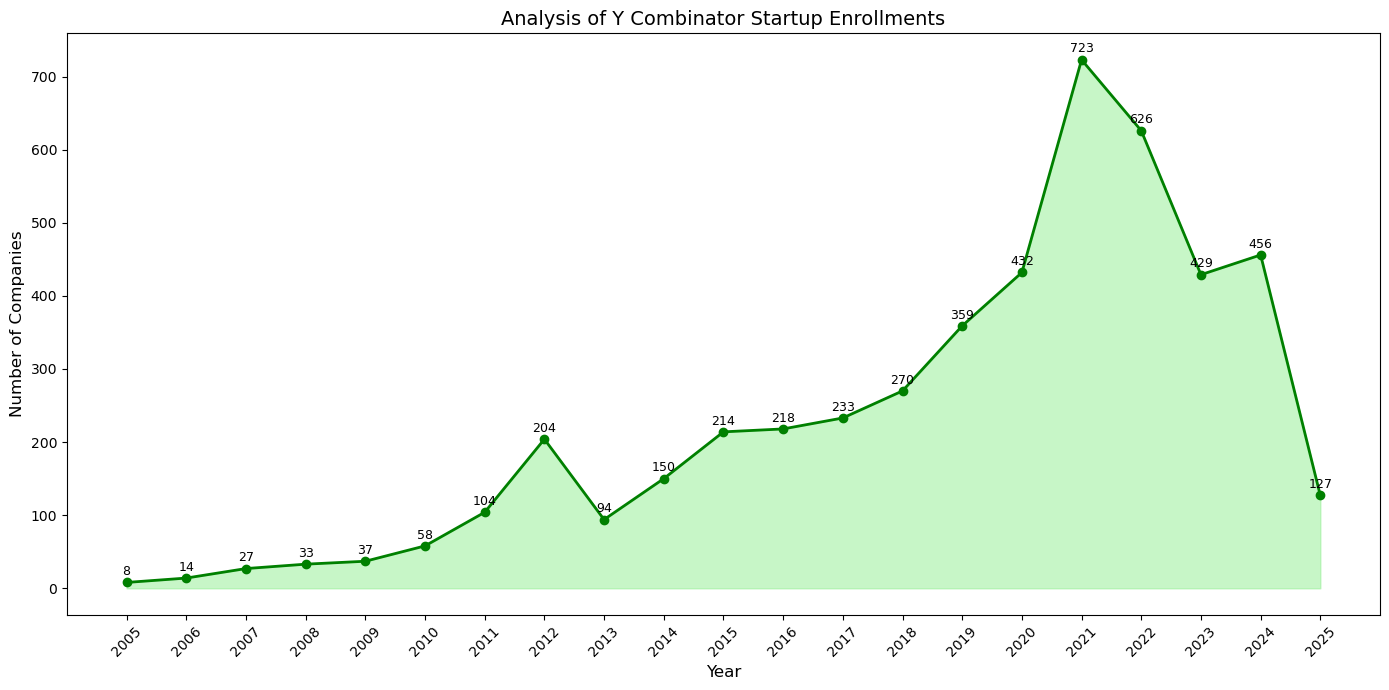

In [ ]:
yearly_counts = df['batch_year'].value_counts().sort_index()

years = yearly_counts.index.astype(int)   
counts = yearly_counts.values

plt.figure(figsize=(14, 7))
plt.fill_between(years, counts, color='lightgreen', alpha=0.5)
plt.plot(years, counts, color='green', marker='o', linewidth=2)

for i, count in enumerate(counts):
    plt.text(years[i], count + 10, str(count), ha='center', fontsize=9)

plt.title("Analysis of Y Combinator Startup Enrollments", fontsize=14)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Companies", fontsize=12)
plt.xticks(ticks=years, labels=years, rotation=45) 
plt.tight_layout()
plt.show()

In [ ]:
df['tags'] = df['tags'].apply(ast.literal_eval)

In [ ]:
import re

def normalize_tags(tag_list):
    normalized = []
    for tag in tag_list:
        tag_lower = tag.lower().strip()
        if re.search(r'\b(ai|artificial intelligence|generative ai)\b', tag_lower):
            if "artificial intelligence" not in normalized:
                normalized.append("artificial intelligence")
        else:
            normalized.append(tag_lower)
    
    return list(set(normalized)) 

df['tags'] = df['tags'].apply(normalize_tags)

In [20]:
df.head()

,id,name,all_locations,long_description,one_liner,team_size,industry,launched_at,tags,batch,status,batch_year
1,30324,Rebolt,"San Francisco, CA, USA",Rebolt is AI to replace traditional restaurant...,Your AI restaurant manager,2.0,B2B,1740196480,"[artificial intelligence, food tech]",W25,Active,2025
2,30340,TamLabs,"San Francisco, CA, USA",TamLabs transforms Microsoft Word into an AI-n...,Transforming Word into an AI Editor,2.0,B2B,1740176772,"[artificial intelligence, legal, finance, prod...",W25,Active,2025
3,29959,Uncommon Therapeutics,"San Francisco, CA, USA","Our founder Noah, an experienced tech entrepre...",A Disease Focused Biotech,2.0,Healthcare,1740166772,"[gene therapy, biotechnology, crispr]",W25,Active,2025
4,30329,Opine,"San Francisco, CA, USA",Opine is a social media app where you can desi...,Social Media for AI Characters,2.0,Consumer,1740162817,"[social media, consumer, artificial intelligence]",W25,Active,2025
5,30220,Verbiflow,"San Francisco, CA, USA",Verbiflow is the all-in-one platform for sales...,The Swiss Army Knife For Your Sales Team,2.0,B2B,1740147387,"[sales enablement, saas, analytics, sales, art...",W25,Active,2025


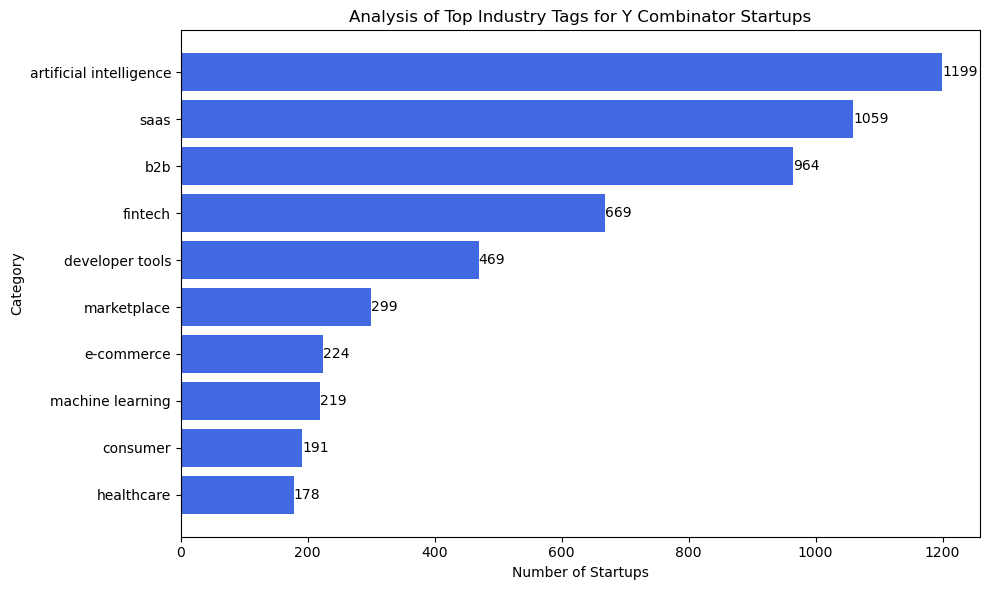

In [ ]:
all_tags = [tag for tags in df['tags'] for tag in tags]
tag_counts = Counter(all_tags)

top_tags = tag_counts.most_common(10) 
categories, counts = zip(*top_tags)

plt.figure(figsize=(10,6))
plt.barh(categories, counts, color='royalblue')
plt.xlabel('Number of Startups')
plt.ylabel('Category')
plt.title('Analysis of Top Industry Tags for Y Combinator Startups')
plt.gca().invert_yaxis() 
for index, value in enumerate(counts):
    plt.text(value, index, str(value), va='center')
plt.grid(False) 
plt.tight_layout()
plt.show()

In [22]:
df['status'].value_counts()

status
Active      3341
Inactive     844
Acquired     612
Public        19
Name: count, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4816 entries, 1 to 5154
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4816 non-null   int64  
 1   name              4816 non-null   object 
 2   all_locations     4816 non-null   object 
 3   long_description  4531 non-null   object 
 4   one_liner         4657 non-null   object 
 5   team_size         4741 non-null   float64
 6   industry          4816 non-null   object 
 7   launched_at       4816 non-null   int64  
 8   tags              4816 non-null   object 
 9   batch             4816 non-null   object 
 10  status            4816 non-null   object 
 11  batch_year        4816 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 489.1+ KB


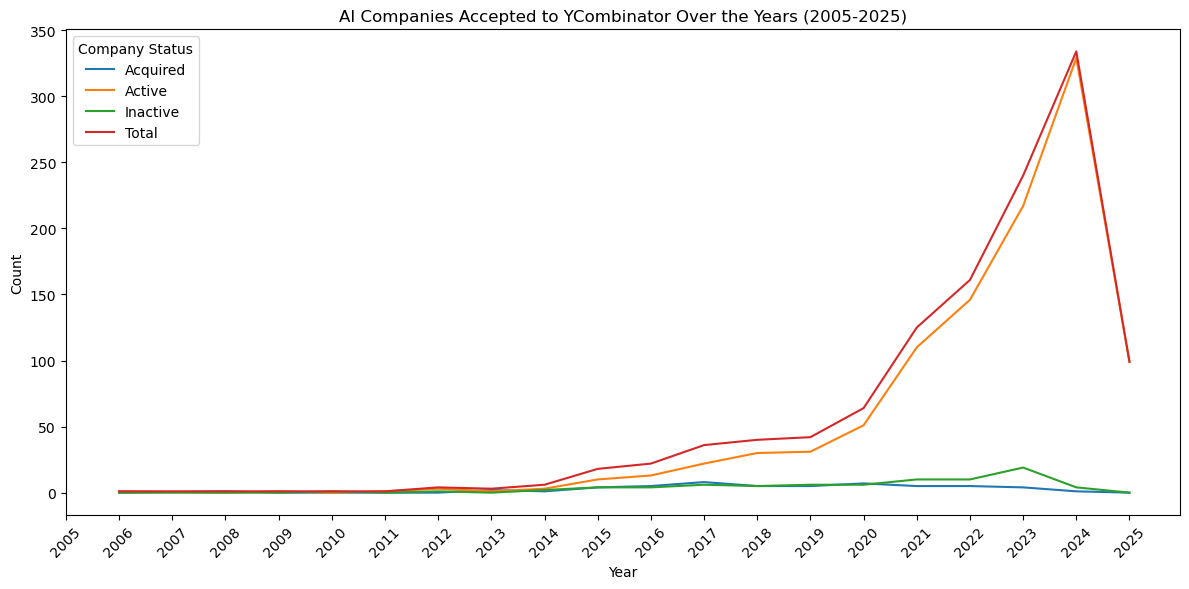

In [ ]:
ai_df = df[df['tags'].apply(lambda tags: 'artificial intelligence' in tags)]

grouped = ai_df.groupby(['batch_year', 'status']).size().unstack(fill_value=0)

grouped['Total'] = grouped.sum(axis=1)

grouped = grouped.sort_index()

plt.figure(figsize=(12, 6))
for column in grouped.columns:
    plt.plot(grouped.index, grouped[column], label=column)

plt.title('AI Companies Accepted to YCombinator Over the Years (2005-2025)')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(ticks=years, labels=years, rotation=45)
plt.legend(title='Company Status')
plt.tight_layout()
plt.show()

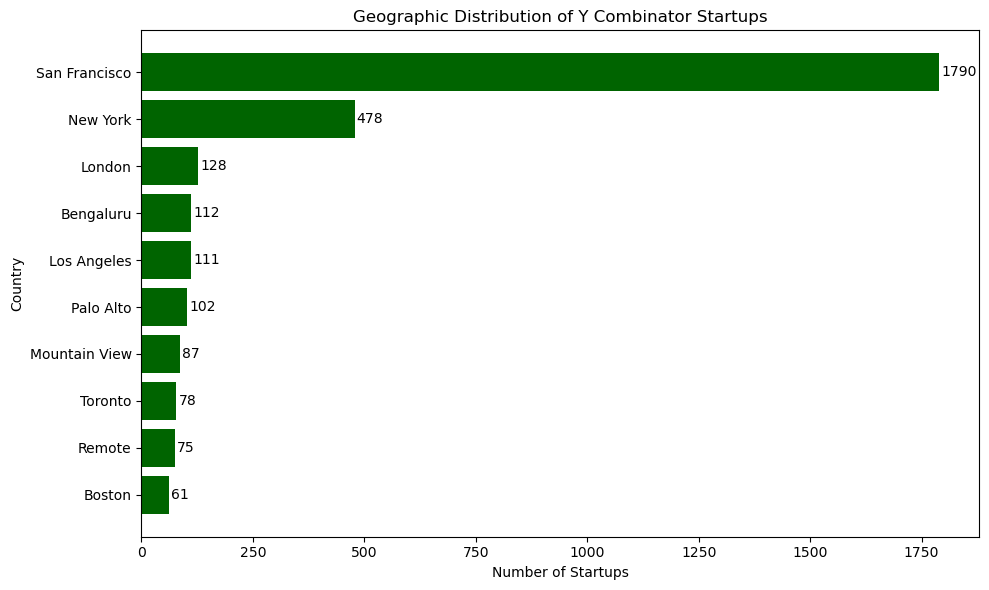

In [ ]:
all_locations = df['all_locations'].dropna().apply(lambda x: x.replace('\n', ' ').split(',')[0].strip())

location_counts = Counter(all_locations).most_common(10)
countries, counts = zip(*location_counts)

plt.figure(figsize=(10, 6))
bars = plt.barh(countries[::-1], counts[::-1], color='darkgreen')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, str(width), va='center')

plt.xlabel("Number of Startups")
plt.ylabel("Country")
plt.title("Geographic Distribution of Y Combinator Startups")
plt.tight_layout()
plt.show()

In [27]:
df.head()

,id,name,all_locations,long_description,one_liner,team_size,industry,launched_at,tags,batch,status,batch_year
1,30324,Rebolt,"San Francisco, CA, USA",Rebolt is AI to replace traditional restaurant...,Your AI restaurant manager,2.0,B2B,1740196480,"[artificial intelligence, food tech]",W25,Active,2025
2,30340,TamLabs,"San Francisco, CA, USA",TamLabs transforms Microsoft Word into an AI-n...,Transforming Word into an AI Editor,2.0,B2B,1740176772,"[artificial intelligence, legal, finance, prod...",W25,Active,2025
3,29959,Uncommon Therapeutics,"San Francisco, CA, USA","Our founder Noah, an experienced tech entrepre...",A Disease Focused Biotech,2.0,Healthcare,1740166772,"[gene therapy, biotechnology, crispr]",W25,Active,2025
4,30329,Opine,"San Francisco, CA, USA",Opine is a social media app where you can desi...,Social Media for AI Characters,2.0,Consumer,1740162817,"[social media, consumer, artificial intelligence]",W25,Active,2025
5,30220,Verbiflow,"San Francisco, CA, USA",Verbiflow is the all-in-one platform for sales...,The Swiss Army Knife For Your Sales Team,2.0,B2B,1740147387,"[sales enablement, saas, analytics, sales, art...",W25,Active,2025


In [28]:
df.to_csv('companies_data.csv', index=False)